# Digital Image Processing - Assignment 3

**Imports**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Ambitious Jo

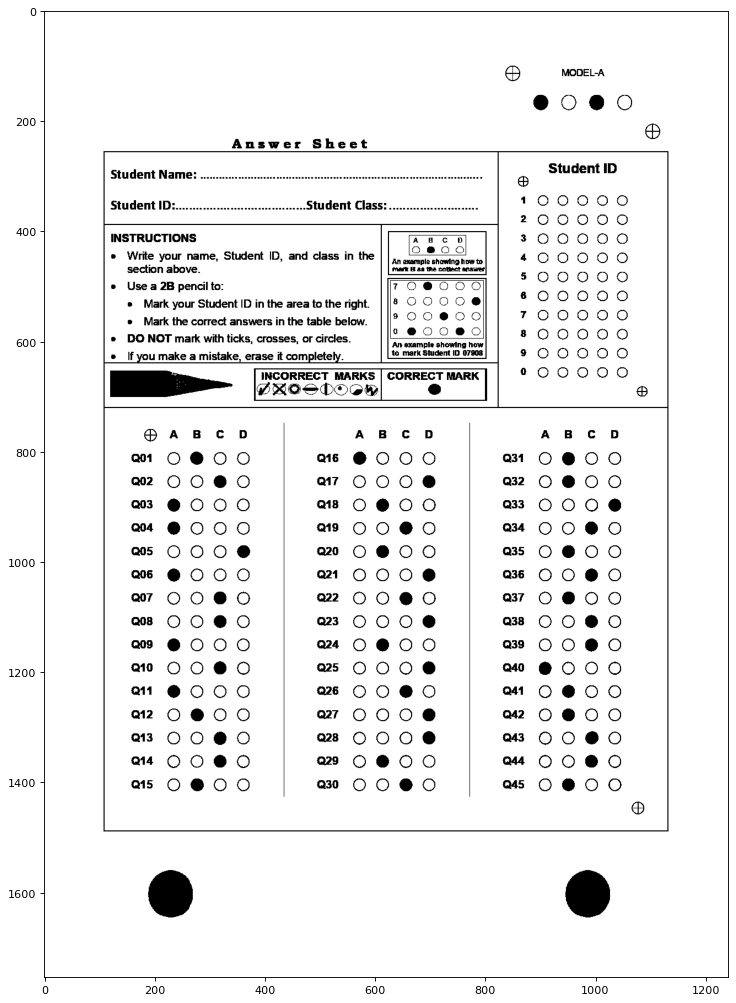

In [2]:
from matplotlib.pyplot import figure
figure(figsize=(24, 16), dpi=80)

img = cv2.imread('../imgs/answerKey.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img[:,:,0]
img = img>240
img = img.astype(int)
img = img*255
plt.imshow(img, cmap='gray')
plt.show()

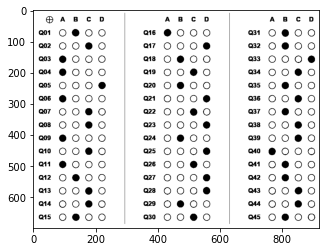

In [3]:
demn = img[740:1440, 140:1060]
plt.imshow(demn, cmap='gray')
plt.show()

In [4]:
hoe1 = np.full((25, 25, 3), 255)

for x in range(25):
    for y in range(25):
        if (x-12)**2 + (y-12)**2 < 122:
            hoe1[x,y,:] = 0
        elif (x-12)**2 + (y-12)**2 < 170:
            hoe1[x,y,:] = -1
        
hoe1 = hoe1[:,:,0]

In [5]:
[d0, d1] = demn.shape
[f0, f1] = hoe1.shape
ans = []

for x in range(d0):
    for y in range(d1):
        
        if f0+x-1<d0 and f1+y-1<d1:
            
            flg=0
            
            for xx in range(f0):
                for yy in range(f1):
                    
                    if hoe1[xx,yy]==-1:
                        continue
                        
                    elif hoe1[xx,yy]!=demn[x+xx, y+yy]:
                        flg=1
                        break
                        
            if flg==0:
                ans.append([x, y])

In [6]:
boy = np.array(ans)
b0 = list(boy[:,0])
b0 = sorted(b0, key = b0.count, reverse = True)
b1 = list(boy[:,1])
b1 = sorted(b1, key = b1.count, reverse = True)

bb0 = []
for i in b0:
    flg = 0
    for j in bb0:
        if abs(i-j)<=5:
            flg=1
    if flg==0:
        bb0.append(i)
bb0.sort()

bb1 = []
for i in b1:
    flg = 0
    for j in bb1:
        if abs(i-j)<=5:
            flg=1
    if flg==0:
        bb1.append(i)
bb1.sort()

In [7]:
cart_prod = [(a,b) for a in bb0 for b in bb1]
cart_prod = np.array(cart_prod, dtype="i,i")
cart_prod = cart_prod.reshape(45, 4)
cart_prod.shape

(45, 4)